In [1]:
import numpy as np


import pandas as pd

# Load the dataset (Make sure to upload it to Colab first)
df = pd.read_csv("artworks.csv", encoding="utf-8")

# Display basic info
df.info()

# Show the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Artwork ID          130262 non-null  int64  
 1   Title               130200 non-null  object 
 2   Artist ID           128802 non-null  object 
 3   Name                128802 non-null  object 
 4   Date                127950 non-null  object 
 5   Medium              118343 non-null  object 
 6   Dimensions          118799 non-null  object 
 7   Acquisition Date    124799 non-null  object 
 8   Credit              127192 non-null  object 
 9   Catalogue           130262 non-null  object 
 10  Department          130262 non-null  object 
 11  Classification      130262 non-null  object 
 12  Object Number       130262 non-null  object 
 13  Diameter (cm)       1399 non-null    float64
 14  Circumference (cm)  10 non-null      float64
 15  Height (cm)         111893 non-nul

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN


In [3]:
df.isnull().sum()

Artwork ID           0
Title               62
Artist ID            0
Name                 0
Date                 0
Medium               0
Dimensions           0
Acquisition Date     0
Catalogue            0
Department           0
Classification       0
Object Number        0
Height (cm)          0
Width (cm)           0
dtype: int64

In [5]:
print(df_no_outliers.columns)


Index(['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium',
       'Dimensions', 'Acquisition Date', 'Catalogue', 'Department',
       'Classification', 'Object Number', 'Height (cm)', 'Width (cm)'],
      dtype='object')


In [8]:
# Ensure df_no_outliers is a copy to avoid SettingWithCopyWarning
df_no_outliers = df_no_outliers.copy()

# Convert Acquisition Date to datetime format
df_no_outliers.loc[:, 'Acquisition Date'] = pd.to_datetime(df_no_outliers['Acquisition Date'], errors='coerce')

# Define 'recent acquisitions' as the top 30% most recent artworks
threshold_date = df_no_outliers['Acquisition Date'].quantile(0.7)

# Create 'Exhibited Likely' column safely
df_no_outliers.loc[:, 'Exhibited Likely'] = (df_no_outliers['Acquisition Date'] >= threshold_date).astype(int)

# Check distribution of the new label
print(df_no_outliers['Exhibited Likely'].value_counts(normalize=True))


Exhibited Likely
0    0.698965
1    0.301035
Name: proportion, dtype: float64


In [9]:
print(df_no_outliers.columns)


Index(['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium',
       'Dimensions', 'Acquisition Date', 'Catalogue', 'Department',
       'Classification', 'Object Number', 'Height (cm)', 'Width (cm)',
       'Exhibited Likely'],
      dtype='object')


In [12]:
print(df_no_outliers.columns.tolist())  


['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium', 'Dimensions', 'Acquisition Date', 'Catalogue', 'Department', 'Classification', 'Object Number', 'Height (cm)', 'Width (cm)', 'Exhibited Likely']


In [13]:
df_no_outliers['Acquisition Year'] = df_no_outliers['Acquisition Date'].dt.year


In [14]:
print(df_no_outliers.columns.tolist())  

['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium', 'Dimensions', 'Acquisition Date', 'Catalogue', 'Department', 'Classification', 'Object Number', 'Height (cm)', 'Width (cm)', 'Exhibited Likely', 'Acquisition Year']


In [15]:
print(df_no_outliers[['Acquisition Year', 'Exhibited Likely']].shape)

(112904, 2)


In [16]:
X = df_no_outliers[['Acquisition Year']]
y = df_no_outliers['Exhibited Likely']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9893273105708339
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15831
           1       1.00      0.96      0.98      6750

    accuracy                           0.99     22581
   macro avg       0.99      0.98      0.99     22581
weighted avg       0.99      0.99      0.99     22581



In [19]:
!pip install matplotlib


In [22]:
pip install jupyter matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 8.2 MB/s eta 0:00:00a 0:00:01m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 7.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 6.0 MB/s eta 0:00:0000:010:01m
Note: you may need to restart the kernel to use updated packages.


In [26]:
X = df_no_outliers[['Acquisition Year']]
y = df_no_outliers['Exhibited Likely']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9893273105708339
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15831
           1       1.00      0.96      0.98      6750

    accuracy                           0.99     22581
   macro avg       0.99      0.98      0.99     22581
weighted avg       0.99      0.99      0.99     22581



In [29]:
!pip install seaborn


In [32]:
import sys
print(sys.executable)


/Users/isha/anaconda3/envs/new_env/bin/python


In [33]:
!{sys.executable} -m pip install seaborn


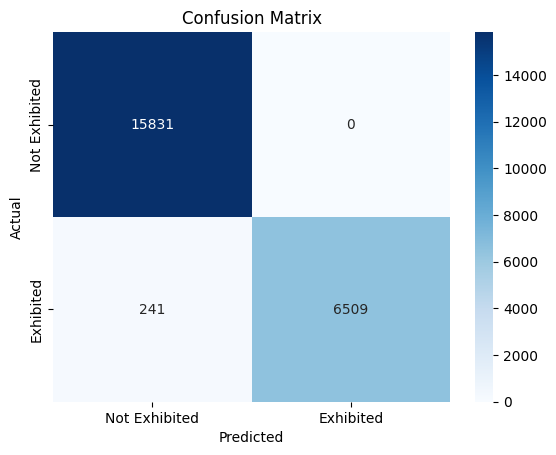

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exhibited', 'Exhibited'], yticklabels=['Not Exhibited', 'Exhibited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'C': 0.001}


In [38]:
feature_names = X_train.columns
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


            Feature  Coefficient
0  Acquisition Year     5.757169


In [39]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")


Cross-validation scores: [0.98931636 0.98953778 0.9887628  0.99009079 0.98848539]
Average cross-validation score: 0.9892386224873911


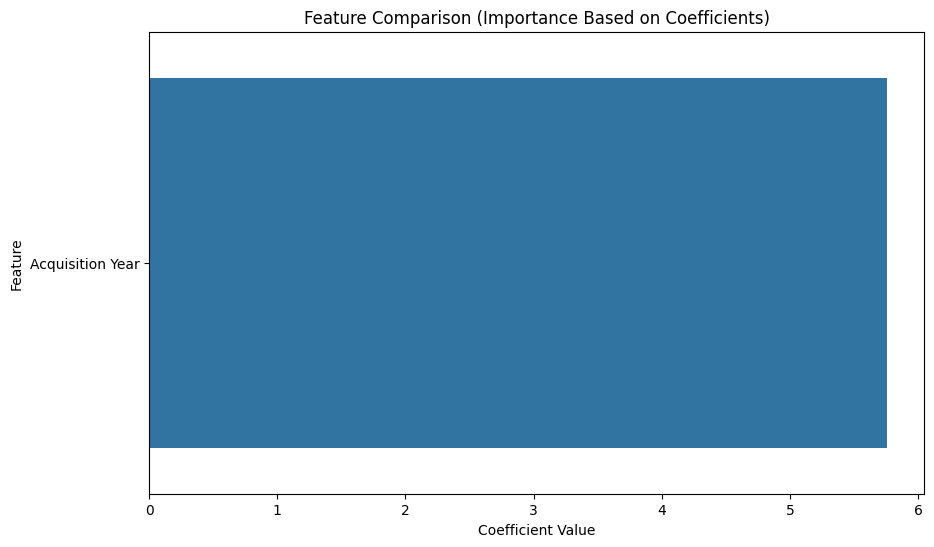

In [46]:
# Get feature names and their corresponding coefficients
features = X_train.columns
coefficients = model.coef_[0]

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Comparison (Importance Based on Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [47]:
import pandas as pd
from datetime import datetime

# Assuming 'df_no_outliers' is your dataset
current_year = datetime.now().year
last_year = current_year - 1

# Filter artworks acquired last year
last_year_artworks = df_no_outliers[df_no_outliers['Acquisition Year'] == last_year]

# Filter oil paintings
oil_paintings = last_year_artworks[last_year_artworks['Medium'].str.contains('Oil', case=False, na=False)]

# Display the filtered artworks
print(oil_paintings[['Title', 'Artist ID', 'Acquisition Year', 'Medium', 'Exhibited Likely']])


Empty DataFrame
Columns: [Title, Artist ID, Acquisition Year, Medium, Exhibited Likely]
Index: []


In [48]:
print(df_no_outliers['Acquisition Year'].unique())


[1995 1997 1966 1980 1990 1989 2000 1992 1988 1993 1947 1987 1981 1975
 1986 1979 1999 1965 1984 1996 1967 1994 1969 1985 1964 1982 1991 1963
 1974 1983 1968 1976 2001 1977 1939 1972 1949 2002 1948 1943 1946 1958
 1957 1952 1934 1945 1973 1960 1998 1955 1950 1978 1954 1953 1944 1962
 1961 1942 1938 1951 1956 1970 1971 1959 1941 1940 1936 1937 1935 1932
 1930 1929 2013 1933 2011 2010 2008 1931 2009 2015 2007 2016 2003 2004
 2005 2014 2006 2012]


In [49]:
print(f"Artworks from {current_year}: {df_no_outliers[df_no_outliers['Acquisition Year'] == current_year].shape[0]}")


Artworks from 2025: 0


In [50]:
# Filter for artworks acquired in 2012 and oil paintings
filtered_data = df_no_outliers[(df_no_outliers['Acquisition Year'] == 2012) & (df_no_outliers['Medium'] == 'Oil')]

# Display the filtered data
print(filtered_data)


Empty DataFrame
Columns: [Artwork ID, Title, Artist ID, Name, Date, Medium, Dimensions, Acquisition Date, Catalogue, Department, Classification, Object Number, Height (cm), Width (cm), Exhibited Likely, Acquisition Year]
Index: []


In [51]:
# Check unique values in the 'Medium' column
print(df_no_outliers['Medium'].unique())



['Paint and colored pencil on print'
 'Graphite, pen, color pencil, ink, and gouache on tracing paper'
 'Photographic reproduction with colored synthetic laminate' ... 'Casette'
 '2 cassettes and 1 DAT' 'Audio reel']


In [53]:
# Filter for artworks with 'oil' in the Medium column (case insensitive)
oil_paintings = df_no_outliers[df_no_outliers['Medium'].str.contains('oil', case=False, na=False)]

# Check the first few rows to confirm
print(oil_paintings.head())

# Filter for artworks from 2012
oil_paintings_2012 = oil_paintings[oil_paintings['Acquisition Year'] == 2012]

# Check the result
oil_paintings_2012.head()


     Artwork ID                                              Title  \
239         297  Sixth Street House project, Santa Monica, Cali...   
243         301           Urban Architecture, project, Perspective   
843         934  The Continuous Monument: On the River, project...   
844         935  The Continuous Monument: St. Moritz Revisited,...   
845         936  The Continuous Monument: On the Rocky Coast, p...   

                              Artist ID  \
239                         8218, 22884   
243                                7661   
843  5733, 8224, 8222, 8220, 8221, 8223   
844  5733, 8222, 8220, 8221, 8223, 8224   
845  5733, 8222, 8220, 8221, 8224, 8223   

                                                  Name                Date  \
239                            Thom Mayne, Andrew Zago  .1-3 1987; .4 1990   
243                                         Aldo Rossi                1976   
843  Superstudio, Cristiano Toraldo di Francia, Gia...                1969   
844  Sup

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Catalogue,Department,Classification,Object Number,Height (cm),Width (cm),Exhibited Likely,Acquisition Year
110018,156383,Uphe,28538,Tomma Abts,2011,Synthetic polymer paint and oil on canvas,"19 x 15"" (48.1 x 38.1 cm)",2012-02-15,Y,Painting & Sculpture,Painting,524.2012,48.101346,38.100076,1,2012
110094,156760,Untitled,4026,Joan Mitchell,1957,Oil on paper,"19 1/2 x 17 1/2"" (49.5 x 44.5 cm)",2012-02-14,Y,Drawings,Drawing,499.2012,49.530099,44.450089,1,2012
110117,156800,Untitled,41332,Bernardo Ortiz Campo,(2002),Oil on paper,"8 1/2 x 12 7/8"" (21.6 x 32.7 cm)",2012-02-14,Y,Drawings,Drawing,507.2012,21.590043,32.702565,1,2012
110118,156801,Untitled,41332,Bernardo Ortiz Campo,(1995),Typewriting and linseed oil on photocopy,"13 x 8 1/2"" (33 x 21.6 cm)",2012-02-14,Y,Drawings,Drawing,508.2012,33.020066,21.590043,1,2012
110124,156807,Untitled,41332,Bernardo Ortiz Campo,(2010),Oil on paper,"8 1/8 x 6 1/8"" (20.6 x 15.6 cm)",2012-02-14,Y,Drawings,Drawing,512.2012,20.637541,15.557531,1,2012


        Artwork ID     Title Artist ID                  Name    Date  \
110018      156383      Uphe     28538            Tomma Abts    2011   
110094      156760  Untitled      4026         Joan Mitchell    1957   
110117      156800  Untitled     41332  Bernardo Ortiz Campo  (2002)   
110118      156801  Untitled     41332  Bernardo Ortiz Campo  (1995)   
110124      156807  Untitled     41332  Bernardo Ortiz Campo  (2010)   

                                           Medium  \
110018  Synthetic polymer paint and oil on canvas   
110094                               Oil on paper   
110117                               Oil on paper   
110118   Typewriting and linseed oil on photocopy   
110124                               Oil on paper   

                               Dimensions Acquisition Date Catalogue  \
110018          19 x 15" (48.1 x 38.1 cm)       2012-02-15         Y   
110094  19 1/2 x 17 1/2" (49.5 x 44.5 cm)       2012-02-14         Y   
110117   8 1/2 x 12 7/8" (21.6 x

/var/folders/68/s_jz63l56jqc02nqjwzgdd2r0000gn/T/ipykernel_2249/4017039065.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=oil_paintings_2012, x='Department', palette='Set2')


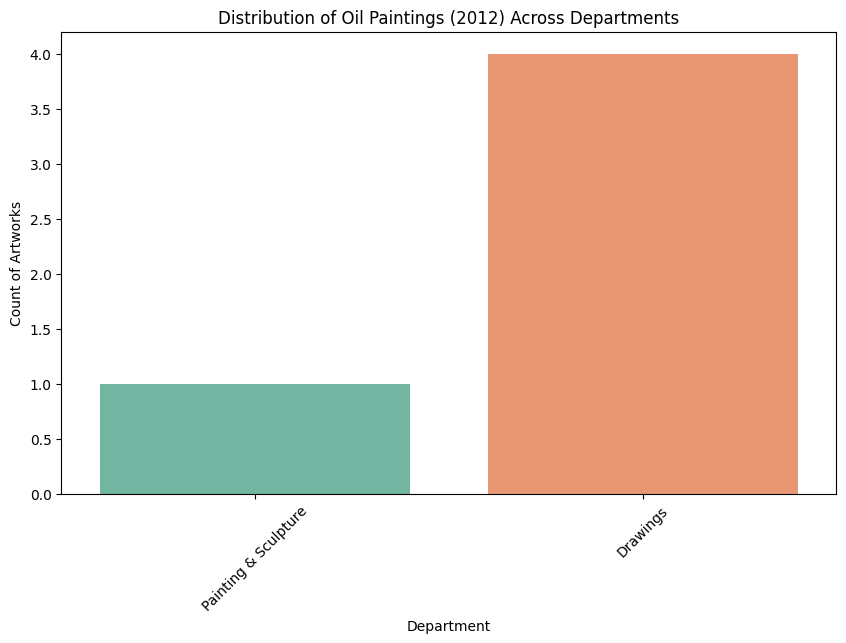

/var/folders/68/s_jz63l56jqc02nqjwzgdd2r0000gn/T/ipykernel_2249/4017039065.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=oil_paintings_2012, x='Artist ID', palette='Set3')


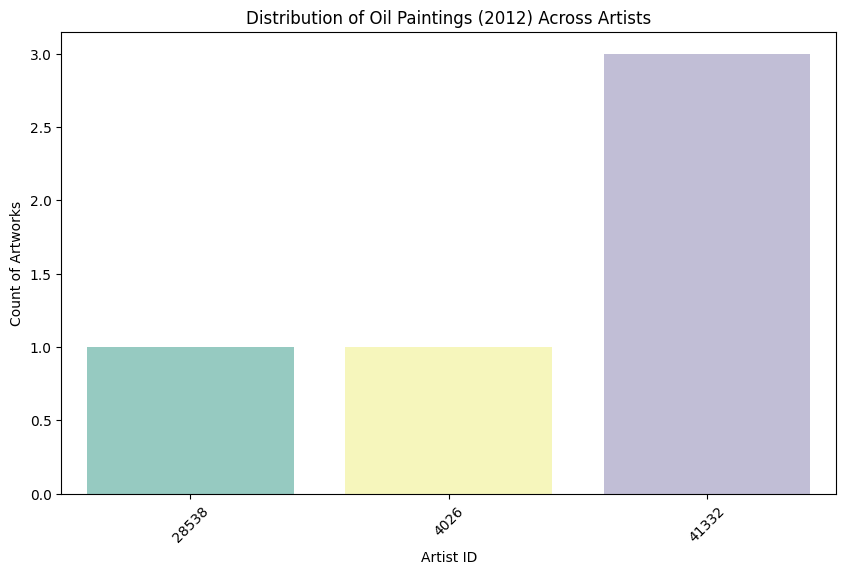

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the filtered data is empty
if oil_paintings_2012.empty:
    print("No oil paintings from 2012 found.")
else:
    # Display the first few rows of the filtered data
    print(oil_paintings_2012.head())

    # Plotting the distribution of artworks across departments
    plt.figure(figsize=(10, 6))
    sns.countplot(data=oil_paintings_2012, x='Department', palette='Set2')
    plt.title('Distribution of Oil Paintings (2012) Across Departments')
    plt.xlabel('Department')
    plt.ylabel('Count of Artworks')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting the distribution of artworks across artists
    plt.figure(figsize=(10, 6))
    sns.countplot(data=oil_paintings_2012, x='Artist ID', palette='Set3')
    plt.title('Distribution of Oil Paintings (2012) Across Artists')
    plt.xlabel('Artist ID')
    plt.ylabel('Count of Artworks')
    plt.xticks(rotation=45)
    plt.show()


Empty DataFrame
Columns: [Artwork ID, Title, Artist ID, Name, Date, Medium, Dimensions, Acquisition Date, Catalogue, Department, Classification, Object Number, Height (cm), Width (cm), Exhibited Likely, Acquisition Year]
Index: []
Empty DataFrame
Columns: [Title, Artist ID, Acquisition Year, Exhibited Likely]
Index: []


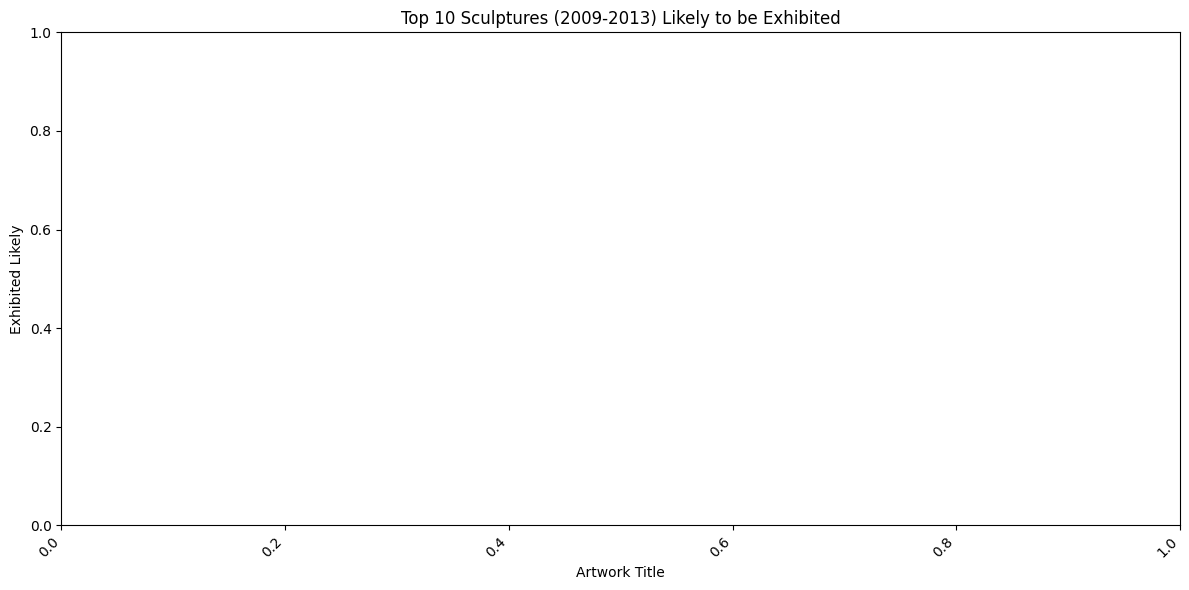

In [58]:
# Filter sculptures from 2009-2013 (acquisition years)
sculptures_2009_2013 = df_no_outliers[
    (df_no_outliers['Department'] == 'Sculpture') & 
    (df_no_outliers['Acquisition Year'] >= 2009) & 
    (df_no_outliers['Acquisition Year'] <= 2013)
]

# Check if we have any sculptures in this range
print(sculptures_2009_2013.head())

# Sort by 'Exhibited Likely' to get the top 10 exhibited sculptures
top_10_sculptures = sculptures_2009_2013.sort_values(by='Exhibited Likely', ascending=False).head(10)

# Display the top 10 sculptures
print(top_10_sculptures[['Title', 'Artist ID', 'Acquisition Year', 'Exhibited Likely']])

# Visualizing the top 10 sculptures
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_sculptures, x='Title', y='Exhibited Likely', palette='Blues_d')
plt.title('Top 10 Sculptures (2009-2013) Likely to be Exhibited')
plt.xlabel('Artwork Title')
plt.ylabel('Exhibited Likely')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [59]:
# Check unique departments to ensure 'Sculpture' exists
print(df_no_outliers['Department'].unique())

# Check unique acquisition years to ensure the range 2009-2013 is valid
print(df_no_outliers['Acquisition Year'].unique())



['Architecture & Design' 'Prints & Illustrated Books' 'Drawings'
 'Painting & Sculpture' 'Photography' 'Media and Performance Art' 'Film'
 'Architecture & Design - Image Archive' 'Fluxus Collection']
[1995 1997 1966 1980 1990 1989 2000 1992 1988 1993 1947 1987 1981 1975
 1986 1979 1999 1965 1984 1996 1967 1994 1969 1985 1964 1982 1991 1963
 1974 1983 1968 1976 2001 1977 1939 1972 1949 2002 1948 1943 1946 1958
 1957 1952 1934 1945 1973 1960 1998 1955 1950 1978 1954 1953 1944 1962
 1961 1942 1938 1951 1956 1970 1971 1959 1941 1940 1936 1937 1935 1932
 1930 1929 2013 1933 2011 2010 2008 1931 2009 2015 2007 2016 2003 2004
 2005 2014 2006 2012]


In [61]:
# Filter for Sculpture department and Acquisition Year between 2009 and 2013
sculptures_2009_2013 = df_no_outliers[
    (df_no_outliers['Department'] == 'Painting & Sculpture') & 
    (df_no_outliers['Acquisition Year'].between(2009, 2013))
]

# Check the first few rows to confirm the data
print(sculptures_2009_2013.head())

# Get the top 10 sculptures based on Exhibited Likely (assuming we want to sort them by this column)
top_sculptures = sculptures_2009_2013.sort_values(by='Exhibited Likely', ascending=False).head(10)

# Check the result
top_sculptures


       Artwork ID                           Title Artist ID            Name  \
93085      117530                          Planet      1859    León Ferrari   
93339      118151                          Chicks     35075  Efrain Almeida   
93945      119047                   4 White Forms      4474  Blinky Palermo   
96426      126404                   44 Nickel Run       174      Carl Andre   
97524      128475  iamb (blind smile): Chapter 12     37079  R. H. Quaytman   

          Date                                            Medium  \
93085     1979                                   Stainless steel   
93339  2006-07            Umburana wood and oil paint, 32 pieces   
93945     1975  Synthetic polymer paint on aluminum, four panels   
96426     1976               Nickel bars, 44 units (one missing)   
97524     2008                  Silkscreen ink and gesso on wood   

                                              Dimensions Acquisition Date  \
93085                         51" (129.

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Catalogue,Department,Classification,Object Number,Height (cm),Width (cm),Exhibited Likely,Acquisition Year
93085,117530,Planet,1859,León Ferrari,1979,Stainless steel,"51"" (129.5 cm) in diameter",2009-02-11,Y,Painting & Sculpture,Sculpture,288.2009,27.940056,25.400100,1,2009
112786,163599,Body Weights,7662,Franz Erhard Walther,1969,Fabric,"8 11/16 x 255 7/8"" (22 x 650 cm)",2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.48,0.000000,22.000000,1,2010
112770,163583,Shortly Before Twilight,7662,Franz Erhard Walther,1967,Fabric,"17 11/16"" (45 cm) High. 9 loops",2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.32,45.000000,0.000000,1,2010
112768,163581,Closeness,7662,Franz Erhard Walther,1967,Fabric,"10 11/16 x 6 3/4"" (27.1 x 17.1 cm)",2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.30,27.127254,17.068834,1,2010
112760,163573,Falling Piece 2 x 15,7662,Franz Erhard Walther,1967,Fabric,"Each: 7 7/8 x 16 9/16 x 9 1/16"" (20 x 42 x 23 cm)",2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.22,20.000000,42.000000,1,2010
112756,163569,Way Inside Outside,7662,Franz Erhard Walther,1966,Fabric,Unknown,2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.18,27.940056,25.400100,1,2010
112748,163561,Score,7662,Franz Erhard Walther,1965,Fabric,"26 x 39 3/8"" (66 x 100 cm)",2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.10,0.000000,66.000000,1,2010
112744,163557,Land Measurement by Drawing,7662,Franz Erhard Walther,1964,Fabric,Unknown,2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.6,27.940056,25.400100,1,2010
112743,163556,Eleven Meter Path,7662,Franz Erhard Walther,1964,Fabric,"21 5/8 x 433 1/16"" (55 x 1100 cm)",2010-12-09,Y,Painting & Sculpture,Sculpture,1060.2010.5,0.000000,54.991110,1,2010
111133,160512,Hotel Bristol from H-Fact: Hospitality/Hostility,30848,Hüseyin Bahri Alptekin,2003-07,Light box,"6 1/2 x 25 1/2 x 4 3/4"" (16.5 x 64.8 x 12.1 cm...",2012-06-04,Y,Painting & Sculpture,Sculpture,772.2012.2.a-b,16.510033,64.770130,1,2012
